In [120]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
all_coords = torch.tensor([[[0,0,0],[1,1,0],[3,2,0],[5,5,0],[6,3,0]],
                           [[0,0,0],[1,1,0],[3,2,0],[5,5,0],[6,3,0]]], dtype=torch.float32)

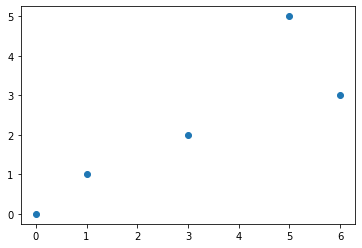

In [122]:
plt.scatter(all_coords[0,:,0], all_coords[0,:,1])

### Build D 

In [123]:
d = torch.zeros(all_coords.shape[:2])

In [124]:
for i in range(1, all_coords.shape[1]):
    temp_dis = torch.norm(all_coords[:,i] - all_coords[:,i-1], dim=1)
    d[:,i] = d[:,i-1] + temp_dis

In [125]:
d

tensor([[0.0000, 1.4142, 3.6503, 7.2558, 9.4919],
        [0.0000, 1.4142, 3.6503, 7.2558, 9.4919]])

In [126]:
t = torch.tensor([[2.5, 5.6, 9.0], [2.5, 5.6, 9.0]])

In [127]:
tminusd = torch.abs(t.unsqueeze(-1) - d.unsqueeze(1))

In [128]:
tminusd

tensor([[[2.5000, 1.0858, 1.1503, 4.7558, 6.9919],
         [5.6000, 4.1858, 1.9497, 1.6558, 3.8919],
         [9.0000, 7.5858, 5.3497, 1.7442, 0.4919]],

        [[2.5000, 1.0858, 1.1503, 4.7558, 6.9919],
         [5.6000, 4.1858, 1.9497, 1.6558, 3.8919],
         [9.0000, 7.5858, 5.3497, 1.7442, 0.4919]]])

In [129]:
idx_top = torch.topk(tminusd, k=2, largest=False, sorted=False)

In [130]:
idx_top.values

tensor([[[1.0858, 1.1503],
         [1.6558, 1.9497],
         [0.4919, 1.7442]],

        [[1.0858, 1.1503],
         [1.6558, 1.9497],
         [0.4919, 1.7442]]])

In [131]:
idx_top.indices.shape

torch.Size([2, 3, 2])

In [132]:
def gather_batch(input, index):
    b, t, p = index.shape
    _, _, c = input.shape
    output = torch.zeros((b, t, p, c))
    
    for i, (val, idx) in enumerate(zip(input, index)):
        output[i] = val[idx]
    
    return output

In [133]:
coords = gather_batch(all_coords, idx_top.indices)

### M

In [134]:
coords.shape

torch.Size([2, 3, 2, 3])

In [135]:
m = (coords[:,:,1] - coords[:,:,0])/t.unsqueeze(-1)

In [136]:
m.shape

torch.Size([2, 3, 3])

In [137]:
m = m/m.norm(dim=-1, keepdim=True)

In [138]:
tminusd.shape

torch.Size([2, 3, 5])

In [139]:
final_coords = coords[:,:,0] + t.unsqueeze(-1).repeat_interleave(3, dim=-1)*m

In [140]:
final_coords = coords[:,:,0] + idx_top.values[...,:1].repeat_interleave(3, dim=-1)*m

In [141]:
idx_top.values[...,:1].shape, m.shape

(torch.Size([2, 3, 1]), torch.Size([2, 3, 3]))

In [142]:
 final_coords

tensor([[[1.9712, 1.4856, 0.0000],
         [4.0815, 3.6223, 0.0000],
         [5.7800, 3.4400, 0.0000]],

        [[1.9712, 1.4856, 0.0000],
         [4.0815, 3.6223, 0.0000],
         [5.7800, 3.4400, 0.0000]]])

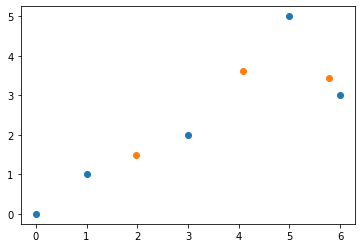

In [143]:
plt.scatter(all_coords[0,:,0], all_coords[0,:,1])
plt.scatter(final_coords[0,:,0], final_coords[0,:,1])